# Dados Brutos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df= pd.read_csv('/content/State_of_data_2022.csv', sep = ',')

In [4]:
# Separando por partes
parte_1 = df.filter(like = 'P1', axis = 1)
parte_2 = df.filter(like = 'P2', axis = 1)
parte_3 = df.filter(like = 'P3', axis = 1)
parte_4 = df.filter(like = 'P4', axis = 1)
parte_5 = df.filter(like = 'P5', axis = 1)
parte_6 = df.filter(like = 'P6', axis = 1)
parte_7 = df.filter(like = 'P7', axis = 1)
parte_8 = df.filter(like = 'P8', axis = 1)

# Parte 2 - Situação de trabalho

In [5]:
series_salarios = parte_2.groupby("('P2_h ', 'Faixa salarial')")["('P2_h ', 'Faixa salarial')"].count()

Text(0.5, 1.0, 'Salário mensal em reais')

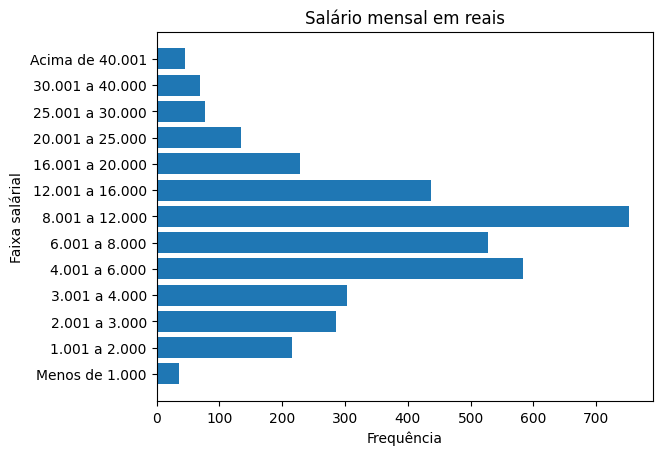

In [6]:
series_salarios = parte_2.groupby("('P2_h ', 'Faixa salarial')")["('P2_h ', 'Faixa salarial')"].count()
faixas_ordenadas = ['Menos de R$ 1.000/mês',
                    'de R$ 1.001/mês a R$ 2.000/mês',
                    'de R$ 2.001/mês a R$ 3.000/mês',
                    'de R$ 3.001/mês a R$ 4.000/mês',
                    'de R$ 4.001/mês a R$ 6.000/mês',
                    'de R$ 6.001/mês a R$ 8.000/mês',
                    'de R$ 8.001/mês a R$ 12.000/mês',
                    'de R$ 12.001/mês a R$ 16.000/mês',
                    'de R$ 16.001/mês a R$ 20.000/mês',
                    'de R$ 20.001/mês a R$ 25.000/mês',
                    'de R$ 25.001/mês a R$ 30.000/mês',
                    'de R$ 30.001/mês a R$ 40.000/mês',
                    'Acima de R$ 40.001/mês'
                    ]

labels = ['Menos de 1.000',
          '1.001 a 2.000',
          '2.001 a 3.000',
          '3.001 a 4.000',
          '4.001 a 6.000',
          '6.001 a 8.000',
          '8.001 a 12.000',
          '12.001 a 16.000',
          '16.001 a 20.000',
          '20.001 a 25.000',
          '25.001 a 30.000',
          '30.001 a 40.000',
          'Acima de 40.001']

series_salarios_reordenadas = series_salarios[faixas_ordenadas]
plt.barh(labels, series_salarios_reordenadas.values)
plt.xlabel('Número de profissionais')
plt.ylabel('Faixa salárial')
plt.title('Salário mensal em reais')

Text(0.5, 0, 'Frequência')

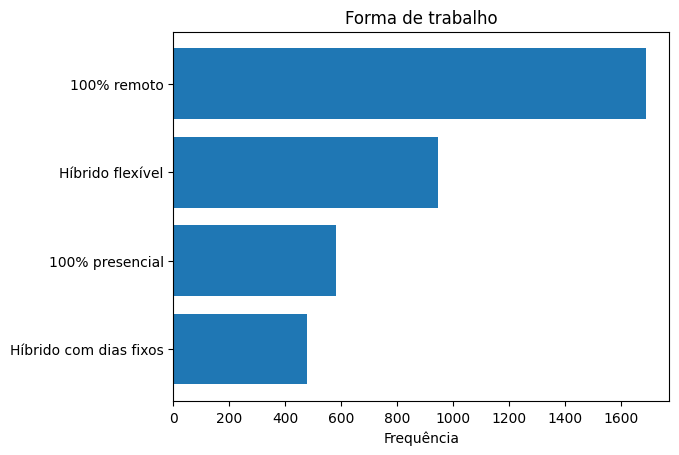

In [7]:
index = ['Híbrido com dias fixos', '100% presencial', 'Híbrido flexível', '100% remoto']
values = df.groupby("('P2_p ', 'Atualmente qual a sua forma de trabalho?')")["('P2_p ', 'Atualmente qual a sua forma de trabalho?')"].count().sort_values(ascending=True).values

plt.barh(index, values)
plt.title('Forma de trabalho')
plt.xlabel('Número de profissionais')

Adicionalmente, destaca-se a marcada predominância do trabalho remoto, tanto no formato completamente remoto quanto no modelo híbrido. No setor de Tecnologia da Informação, observa-se uma tendência crescente em relação ao trabalho remoto, impulsionada ainda mais pela influência da pandemia. Esta análise constata que a área de dados segue essa tendência, mantendo-se alinhada com as evoluções do setor.

# Análise Salarial por Gênero

In [121]:
df_genero_salarios = df.filter(items=["('P1_b ', 'Genero')","('P2_h ', 'Faixa salarial')"])
df_genero_salarios.dropna()

,"('P1_b ', 'Genero')","('P2_h ', 'Faixa salarial')"
0,Masculino,de R$ 8.001/mês a R$ 12.000/mês
1,Masculino,de R$ 4.001/mês a R$ 6.000/mês
2,Masculino,de R$ 12.001/mês a R$ 16.000/mês
3,Masculino,de R$ 12.001/mês a R$ 16.000/mês
4,Feminino,de R$ 6.001/mês a R$ 8.000/mês
...,...,...
4266,Masculino,de R$ 4.001/mês a R$ 6.000/mês
4267,Feminino,de R$ 3.001/mês a R$ 4.000/mês
4268,Masculino,de R$ 16.001/mês a R$ 20.000/mês
4269,Masculino,Menos de R$ 1.000/mês


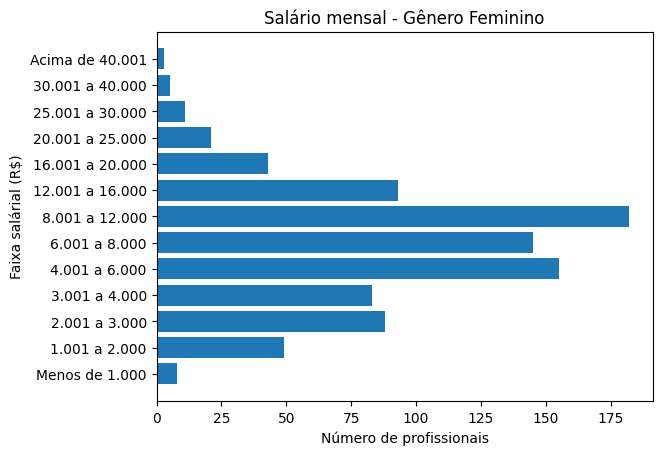

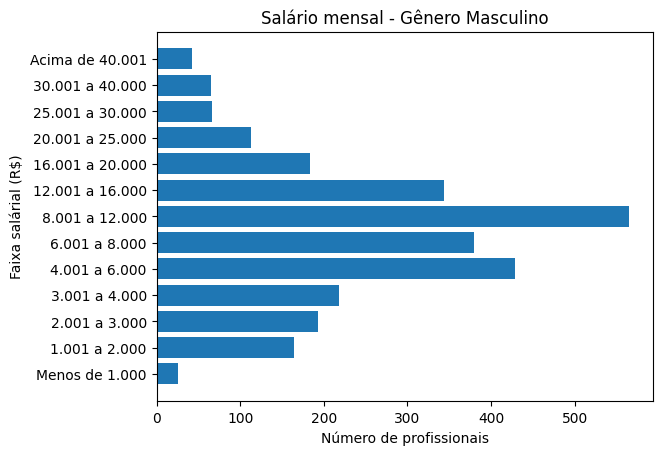

In [296]:
# Realizando um looping para gerar gráficos para cada gênero

lista_genero = ['Feminino', 'Masculino']

for genero in lista_genero:
  df_genero_salarios_grouped = df_genero_salarios[df_genero_salarios["('P1_b ', 'Genero')"] == genero].groupby("('P2_h ', 'Faixa salarial')").count()

  df_genero_salarios_grouped = df_genero_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_genero_salarios_grouped["('P1_b ', 'Genero')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial (R$)')
  plt.title(f'Salário mensal - Gênero {genero}')
  plt.show()

In [232]:
genero_matrix = (df_genero_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P1_b ', 'Genero')"].value_counts().unstack().fillna(0))

genero_matrix

"('P1_b ', 'Genero')",Feminino,Masculino,Prefiro não informar
"('P2_h ', 'Faixa salarial')",,,
Acima de R$ 40.001/mês,3.0,42.0,0.0
Menos de R$ 1.000/mês,8.0,26.0,1.0
de R$ 1.001/mês a R$ 2.000/mês,49.0,165.0,1.0
de R$ 12.001/mês a R$ 16.000/mês,93.0,344.0,0.0
de R$ 16.001/mês a R$ 20.000/mês,43.0,184.0,1.0
de R$ 2.001/mês a R$ 3.000/mês,88.0,193.0,1.0
de R$ 20.001/mês a R$ 25.000/mês,21.0,113.0,0.0
de R$ 25.001/mês a R$ 30.000/mês,11.0,66.0,0.0
de R$ 3.001/mês a R$ 4.000/mês,83.0,218.0,1.0


In [294]:
df_hm_genero = pd.DataFrame(genero_matrix , index = faixas_ordenadas,
                  columns = ['Feminino','Masculino'])
df_hm_genero

,Feminino,Masculino
Menos de R$ 1.000/mês,8.0,26.0
de R$ 1.001/mês a R$ 2.000/mês,49.0,165.0
de R$ 2.001/mês a R$ 3.000/mês,88.0,193.0
de R$ 3.001/mês a R$ 4.000/mês,83.0,218.0
de R$ 4.001/mês a R$ 6.000/mês,155.0,429.0
de R$ 6.001/mês a R$ 8.000/mês,145.0,380.0
de R$ 8.001/mês a R$ 12.000/mês,182.0,565.0
de R$ 12.001/mês a R$ 16.000/mês,93.0,344.0
de R$ 16.001/mês a R$ 20.000/mês,43.0,184.0
de R$ 20.001/mês a R$ 25.000/mês,21.0,113.0


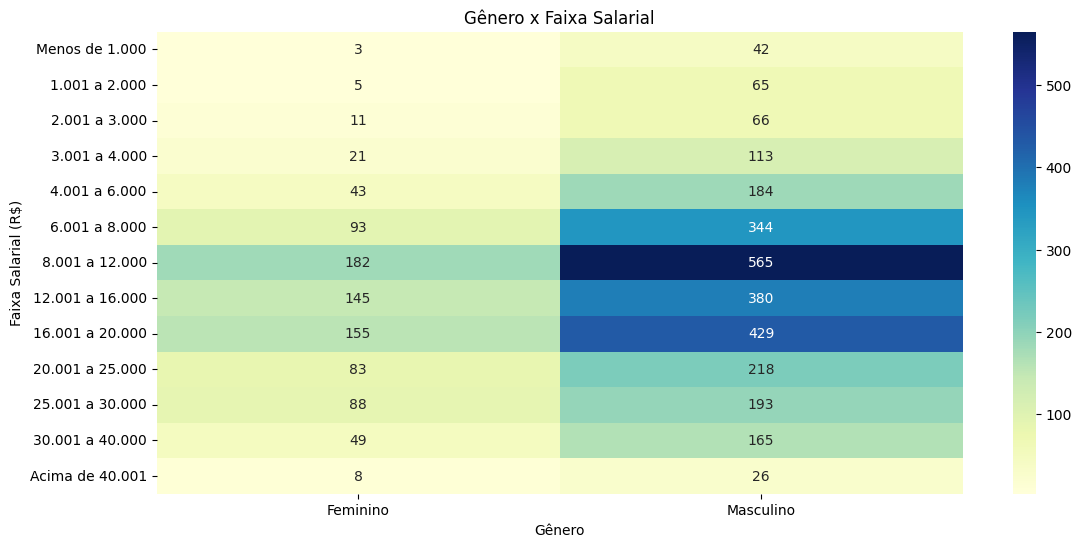

In [295]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_genero.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f', yticklabels = labels)

# plt.barh(labels, df_etnia_salarios_grouped["('P1_c ', 'Cor/raca/etnia')"][faixas_ordenadas])

plt.title('Gênero x Faixa Salarial')
plt.xlabel('Gênero')
plt.ylabel('Faixa Salarial (R$)')
plt.show()

# Análise Salarial por Etnia/Cor/Raça

Como será que estão distribuídas as faixas salariais por etnia?

In [268]:
df_etnia_salarios = df.filter(items=[ "('P1_c ', 'Cor/raca/etnia')","('P2_h ', 'Faixa salarial')"])
df_etnia_salarios

,"('P1_c ', 'Cor/raca/etnia')","('P2_h ', 'Faixa salarial')"
0,Parda,de R$ 8.001/mês a R$ 12.000/mês
1,Parda,de R$ 4.001/mês a R$ 6.000/mês
2,Branca,de R$ 12.001/mês a R$ 16.000/mês
3,Branca,de R$ 12.001/mês a R$ 16.000/mês
4,Branca,de R$ 6.001/mês a R$ 8.000/mês
...,...,...
4266,Branca,de R$ 4.001/mês a R$ 6.000/mês
4267,Branca,de R$ 3.001/mês a R$ 4.000/mês
4268,Branca,de R$ 16.001/mês a R$ 20.000/mês
4269,Branca,Menos de R$ 1.000/mês


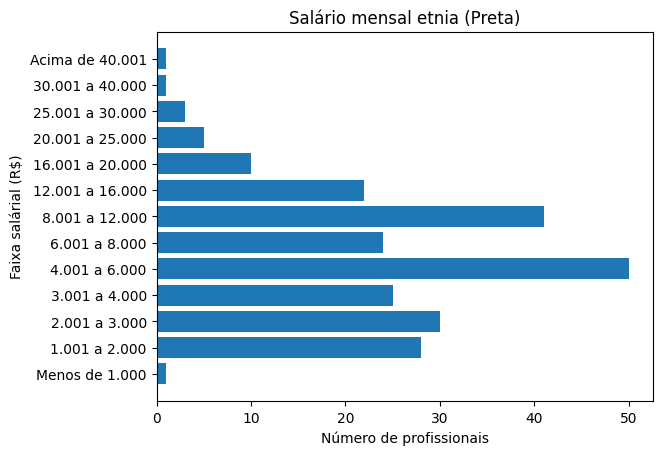

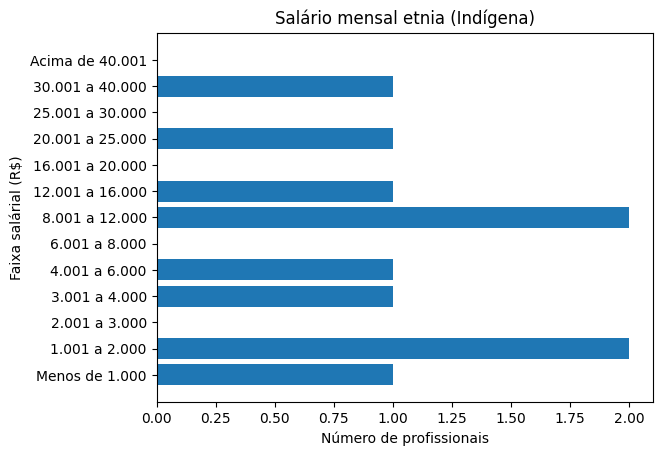

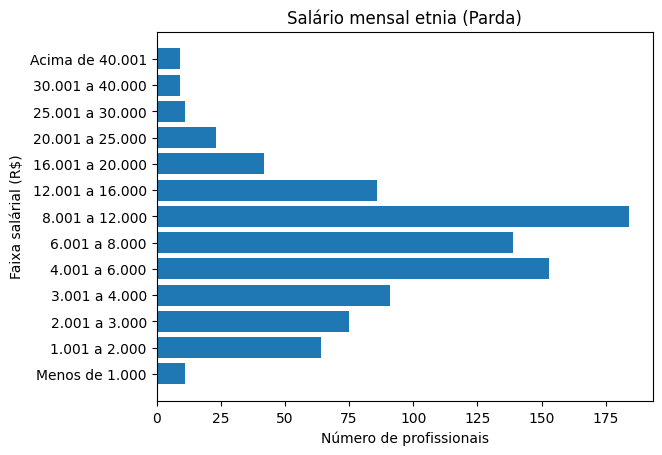

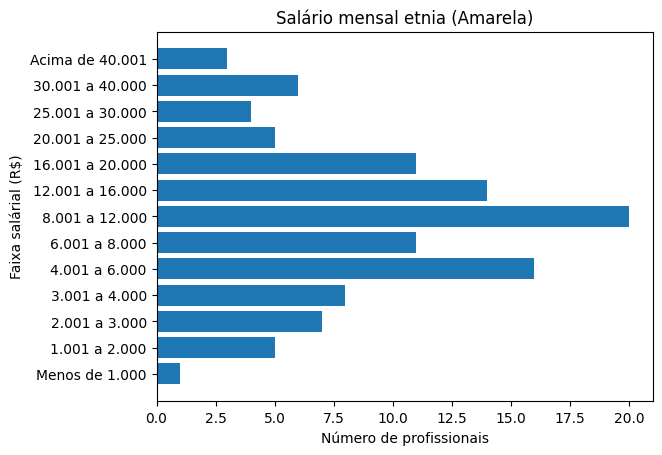

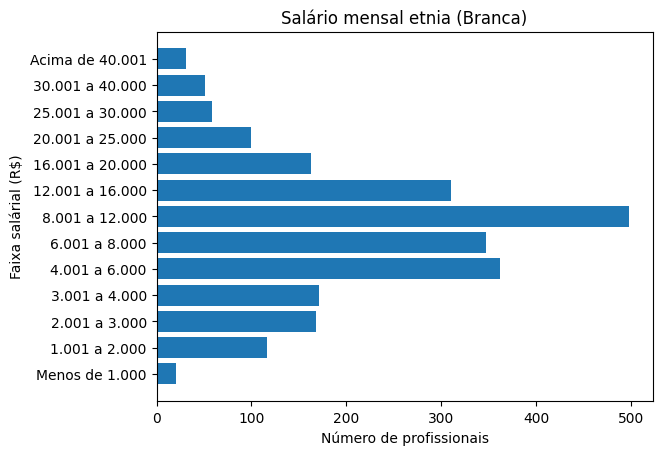

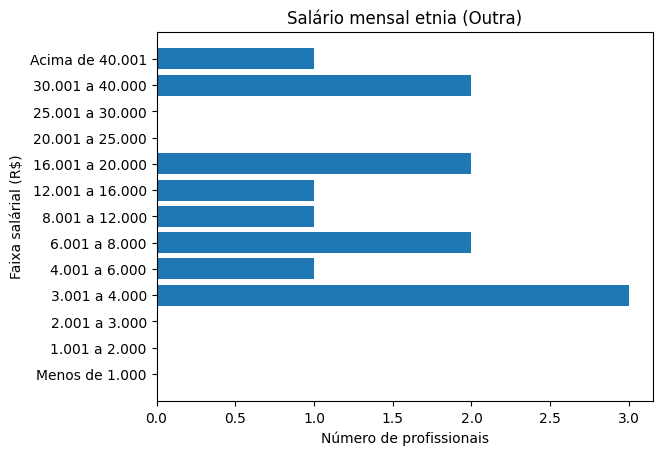

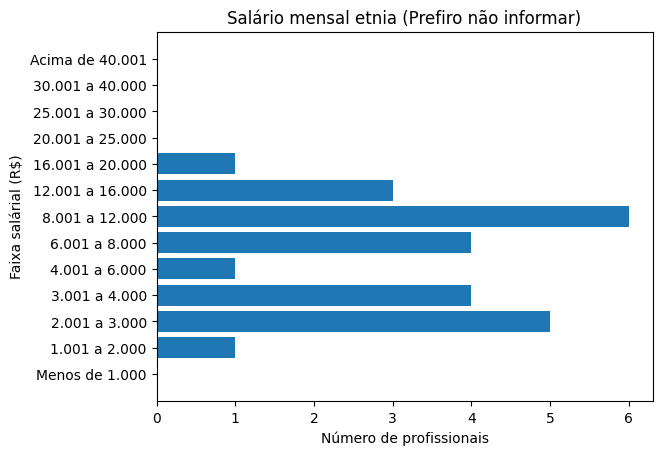

In [297]:
# Realizando um looping para gerar gráficos para cada etnia
lista_etnias = ['Preta','Indígena','Parda','Amarela','Branca', 'Outra', 'Prefiro não informar']

for etnia in lista_etnias:
  df_etnia_salarios_grouped = df_etnia_salarios[df_etnia_salarios["('P1_c ', 'Cor/raca/etnia')"] == etnia].groupby("('P2_h ', 'Faixa salarial')").count()

  df_etnia_salarios_grouped = df_etnia_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_etnia_salarios_grouped["('P1_c ', 'Cor/raca/etnia')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial (R$)')
  plt.title(f'Salário mensal etnia ({etnia})')
  plt.show()


In [286]:
etnia_matrix = (df_etnia_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P1_c ', 'Cor/raca/etnia')"].value_counts().unstack().fillna(0))

etnia_matrix

"('P1_c ', 'Cor/raca/etnia')",Amarela,Branca,Indígena,Outra,Parda,Prefiro não informar,Preta
"('P2_h ', 'Faixa salarial')",,,,,,,
Acima de R$ 40.001/mês,3.0,31.0,0.0,1.0,9.0,0.0,1.0
Menos de R$ 1.000/mês,1.0,21.0,1.0,0.0,11.0,0.0,1.0
de R$ 1.001/mês a R$ 2.000/mês,5.0,116.0,2.0,0.0,64.0,1.0,28.0
de R$ 12.001/mês a R$ 16.000/mês,14.0,310.0,1.0,1.0,86.0,3.0,22.0
de R$ 16.001/mês a R$ 20.000/mês,11.0,163.0,0.0,2.0,42.0,1.0,10.0
de R$ 2.001/mês a R$ 3.000/mês,7.0,168.0,0.0,0.0,75.0,5.0,30.0
de R$ 20.001/mês a R$ 25.000/mês,5.0,100.0,1.0,0.0,23.0,0.0,5.0
de R$ 25.001/mês a R$ 30.000/mês,4.0,59.0,0.0,0.0,11.0,0.0,3.0
de R$ 3.001/mês a R$ 4.000/mês,8.0,171.0,1.0,3.0,91.0,4.0,25.0


In [289]:
df_hm_etnia = pd.DataFrame(etnia_matrix, index = faixas_ordenadas,
                  columns = lista_etnias)
df_hm_etnia

,Preta,Indígena,Parda,Amarela,Branca,Outra,Prefiro não informar
Menos de R$ 1.000/mês,1.0,1.0,11.0,1.0,21.0,0.0,0.0
de R$ 1.001/mês a R$ 2.000/mês,28.0,2.0,64.0,5.0,116.0,0.0,1.0
de R$ 2.001/mês a R$ 3.000/mês,30.0,0.0,75.0,7.0,168.0,0.0,5.0
de R$ 3.001/mês a R$ 4.000/mês,25.0,1.0,91.0,8.0,171.0,3.0,4.0
de R$ 4.001/mês a R$ 6.000/mês,50.0,1.0,153.0,16.0,362.0,1.0,1.0
de R$ 6.001/mês a R$ 8.000/mês,24.0,0.0,139.0,11.0,347.0,2.0,4.0
de R$ 8.001/mês a R$ 12.000/mês,41.0,2.0,184.0,20.0,498.0,1.0,6.0
de R$ 12.001/mês a R$ 16.000/mês,22.0,1.0,86.0,14.0,310.0,1.0,3.0
de R$ 16.001/mês a R$ 20.000/mês,10.0,0.0,42.0,11.0,163.0,2.0,1.0
de R$ 20.001/mês a R$ 25.000/mês,5.0,1.0,23.0,5.0,100.0,0.0,0.0


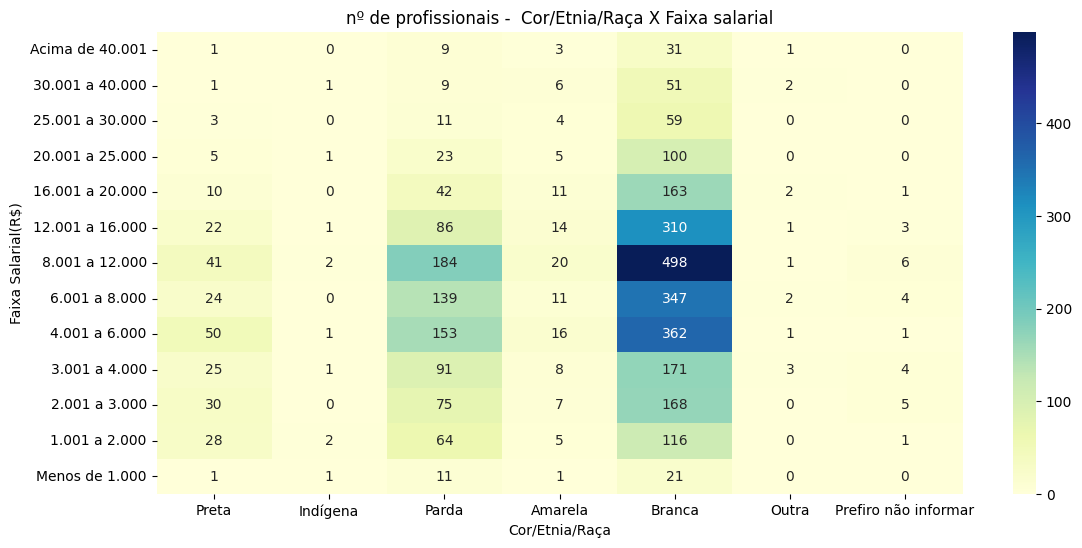

In [291]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_etnia.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f',yticklabels = labels[::-1])

# plt.barh(labels, df_etnia_salarios_grouped["('P1_c ', 'Cor/raca/etnia')"][faixas_ordenadas])

plt.title('nº de profissionais -  Cor/Etnia/Raça X Faixa salarial')
plt.xlabel('Cor/Etnia/Raça')
plt.ylabel('Faixa Salarial(R$)')
plt.show()

# Análise Salarial de PCD

In [298]:
# Realizando um filtro do dataframe apenas com as colunas de genero e faixa salarial
df_pcd_salarios = df.filter(items=["('P1_d ', 'PCD')","('P2_h ', 'Faixa salarial')"])
df_pcd_salarios

,"('P1_d ', 'PCD')","('P2_h ', 'Faixa salarial')"
0,Não,de R$ 8.001/mês a R$ 12.000/mês
1,Não,de R$ 4.001/mês a R$ 6.000/mês
2,Não,de R$ 12.001/mês a R$ 16.000/mês
3,Não,de R$ 12.001/mês a R$ 16.000/mês
4,Não,de R$ 6.001/mês a R$ 8.000/mês
...,...,...
4266,Não,de R$ 4.001/mês a R$ 6.000/mês
4267,Não,de R$ 3.001/mês a R$ 4.000/mês
4268,Não,de R$ 16.001/mês a R$ 20.000/mês
4269,Não,Menos de R$ 1.000/mês


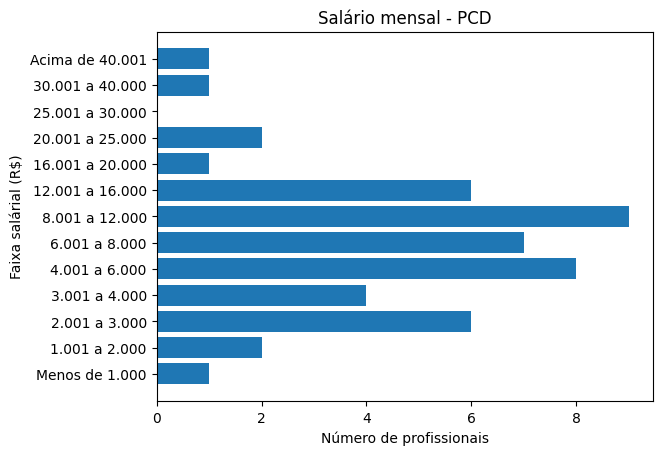

In [299]:
df_pcd_salarios_grouped = df_pcd_salarios[df_pcd_salarios["('P1_d ', 'PCD')"] == 'Sim'].groupby("('P2_h ', 'Faixa salarial')").count()

df_pcd_salarios_grouped = df_pcd_salarios_grouped.reindex(faixas_ordenadas).fillna(0)


plt.barh(labels, df_pcd_salarios_grouped["('P1_d ', 'PCD')"][faixas_ordenadas])
plt.xlabel('Número de profissionais')
plt.ylabel('Faixa salárial (R$)')
plt.title(f'Salário mensal - PCD')
plt.show()

# Análise Salarial por Cargo Ocupado

In [303]:
df_cargos_salarios = df.filter(items=["('P2_f ', 'Cargo Atual')","('P2_h ', 'Faixa salarial')"])
df_cargos_salarios.dropna()

,"('P2_f ', 'Cargo Atual')","('P2_h ', 'Faixa salarial')"
0,DBA/Administrador de Banco de Dados,de R$ 8.001/mês a R$ 12.000/mês
2,Desenvolvedor/ Engenheiro de Software/ Analist...,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,de R$ 2.001/mês a R$ 3.000/mês
...,...,...
4265,Analista de Marketing,de R$ 2.001/mês a R$ 3.000/mês
4266,Analista de Dados/Data Analyst,de R$ 4.001/mês a R$ 6.000/mês
4267,Engenheiro de Dados/Arquiteto de Dados/Data En...,de R$ 3.001/mês a R$ 4.000/mês
4269,Outra Opção,Menos de R$ 1.000/mês


In [155]:
cargos = df_cargos_salarios["('P2_f ', 'Cargo Atual')"]
cargos.unique()

array(['DBA/Administrador de Banco de Dados', nan,
       'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas',
       'Cientista de Dados/Data Scientist', 'Professor',
       'Analista de BI/BI Analyst',
       'Analista de Inteligência de Mercado/Market Intelligence',
       'Analista de Negócios/Business Analyst',
       'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect',
       'Analista de Dados/Data Analyst',
       'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)',
       'Outra Opção', 'Analista de Suporte/Analista Técnico',
       'Engenheiro de Machine Learning/ML Engineer', 'Analytics Engineer',
       'Analista de Marketing', 'Outras Engenharias (não inclui dev)',
       'Estatístico', 'Economista'], dtype=object)

In [159]:
lista_cargos = ['DBA/Administrador de Banco de Dados', 'Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas',
       'Cientista de Dados/Data Scientist', 'Professor',
       'Analista de BI/BI Analyst',
       'Analista de Inteligência de Mercado/Market Intelligence',
       'Analista de Negócios/Business Analyst',
       'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect',
       'Analista de Dados/Data Analyst',
       'Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)',
       'Outra Opção', 'Analista de Suporte/Analista Técnico',
       'Engenheiro de Machine Learning/ML Engineer', 'Analytics Engineer',
       'Analista de Marketing', 'Outras Engenharias (não inclui dev)',
       'Estatístico', 'Economista']
lista_cargos.sort()

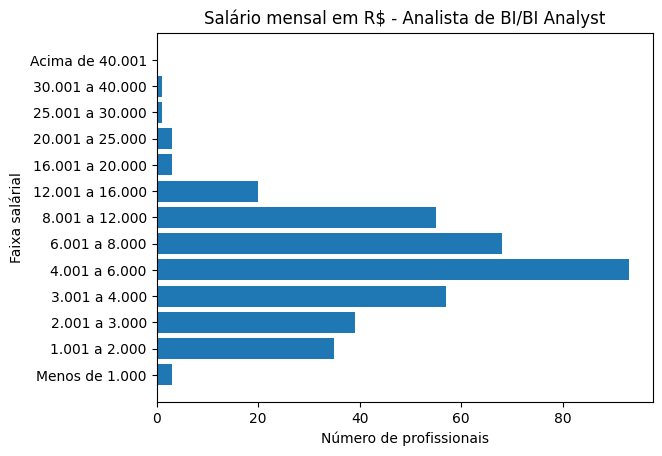

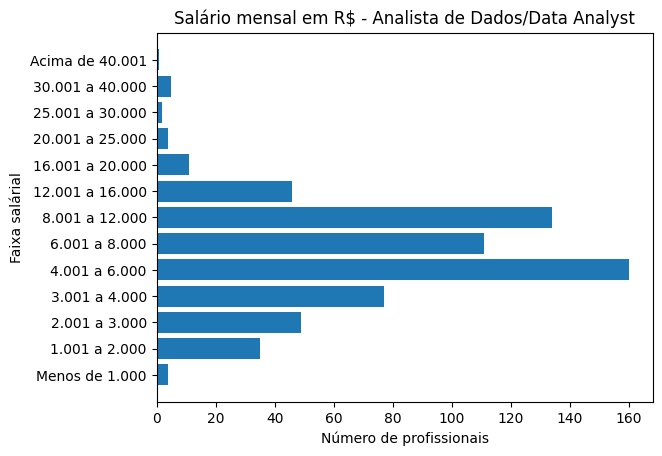

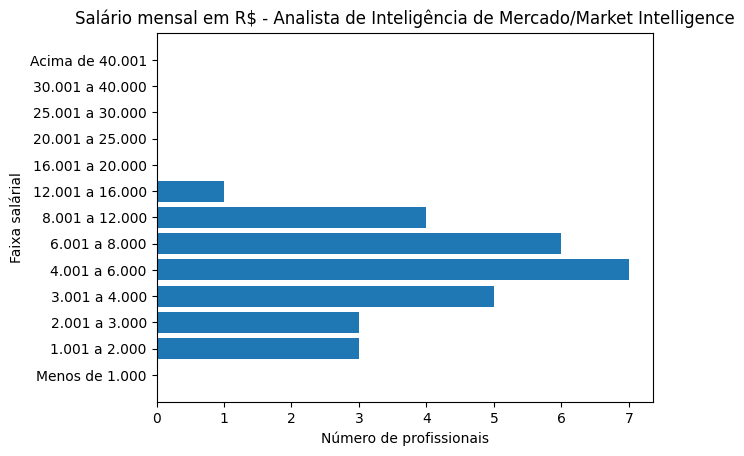

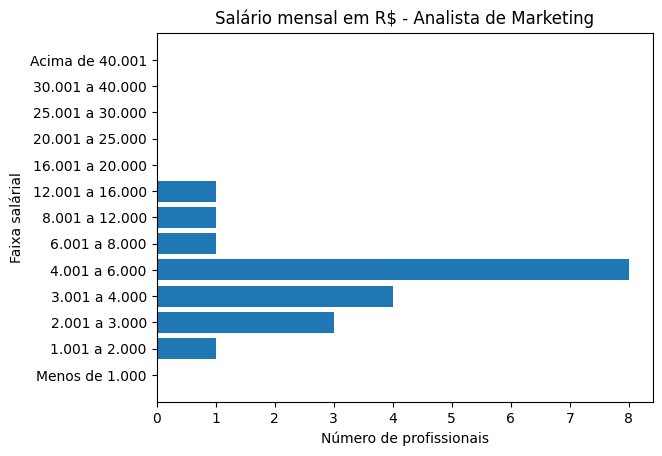

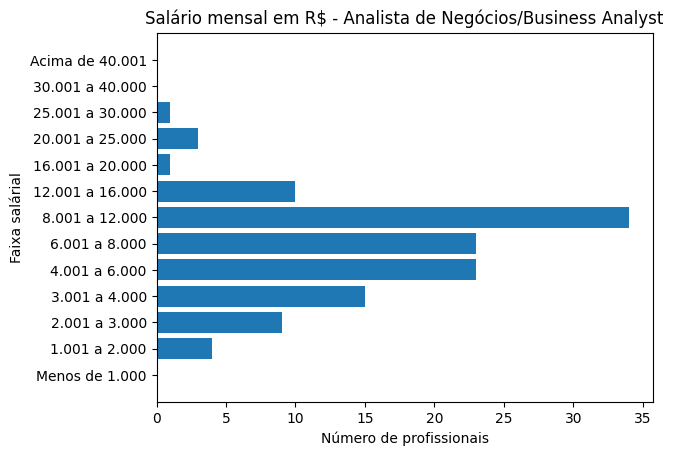

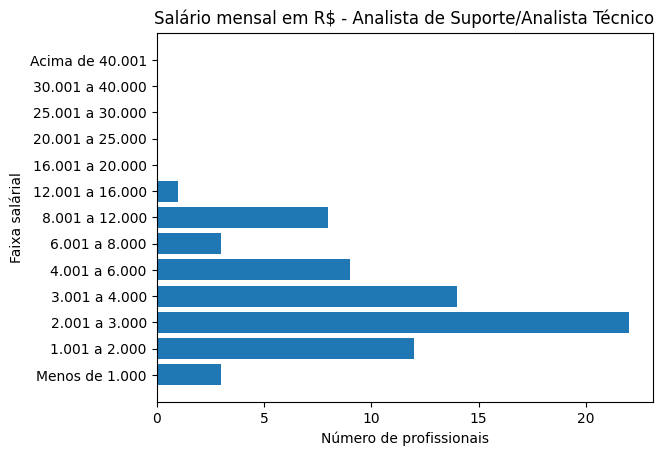

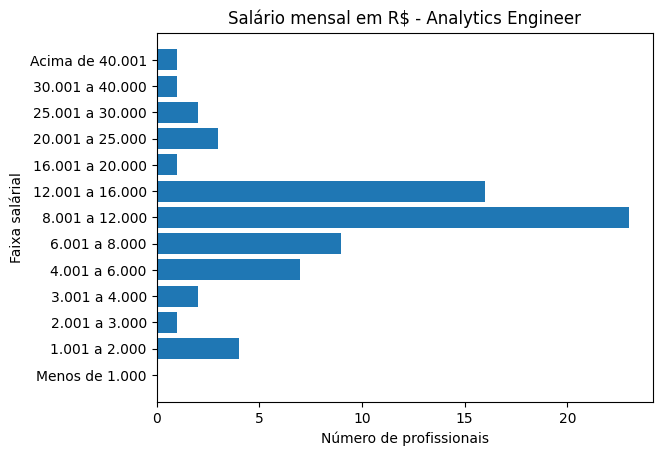

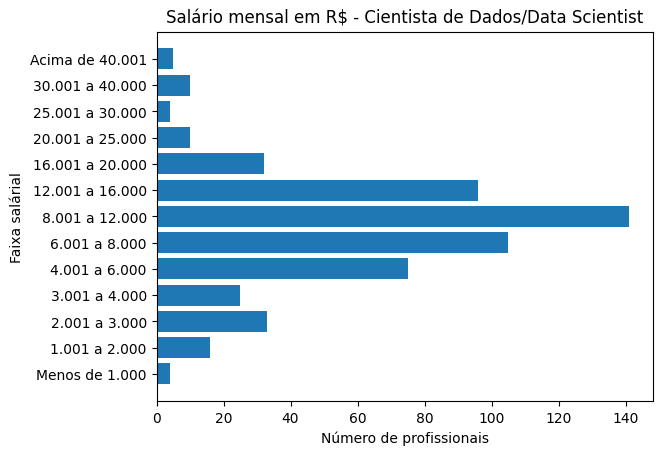

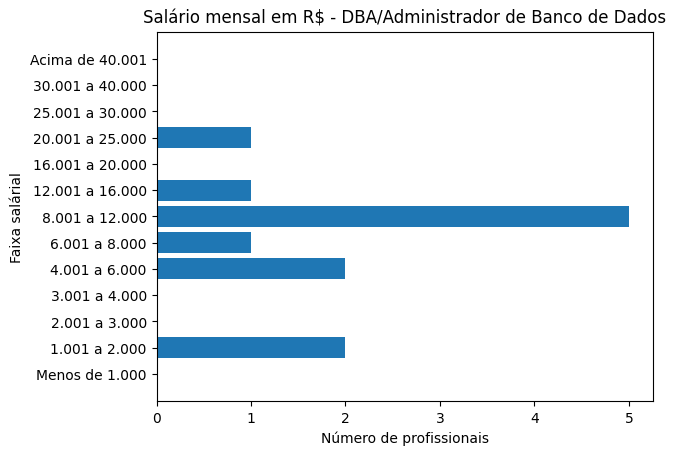

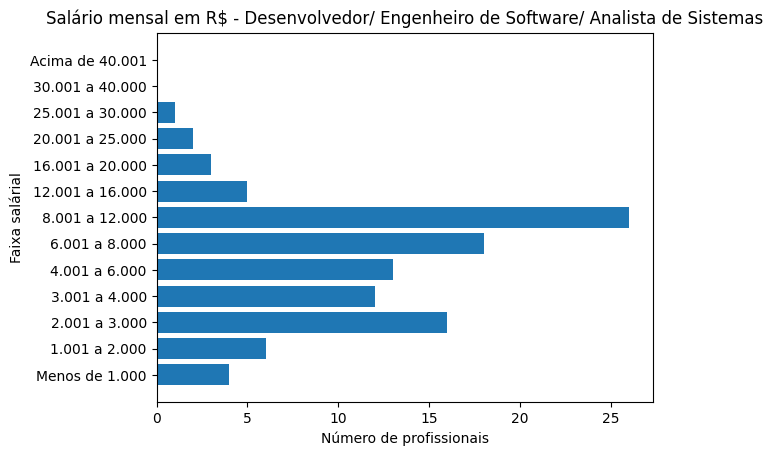

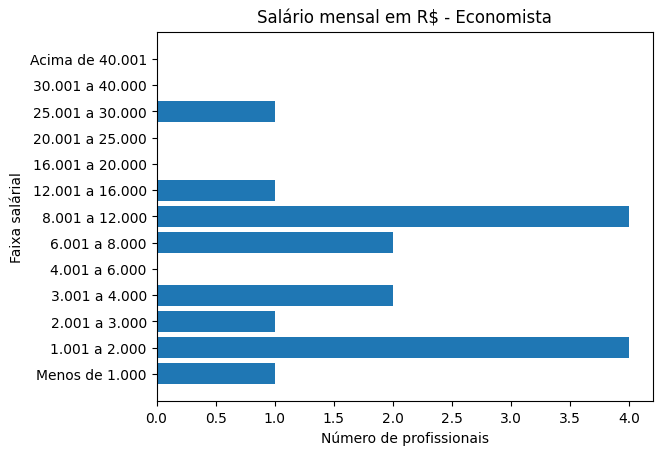

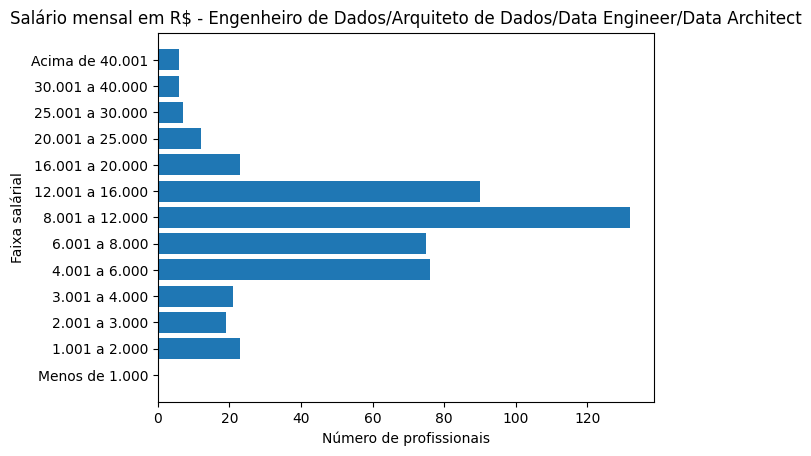

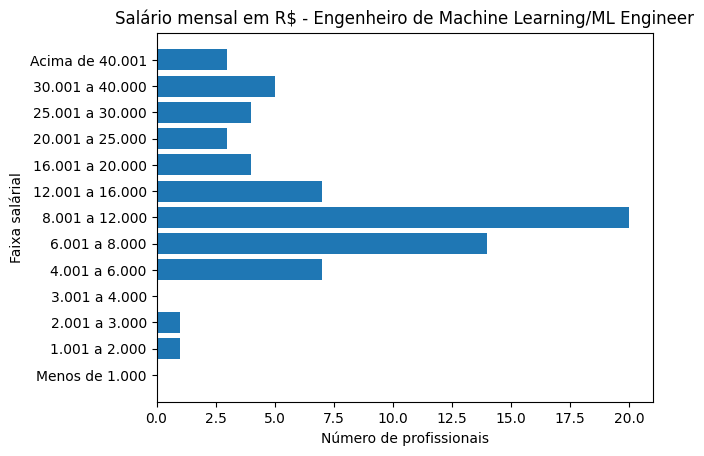

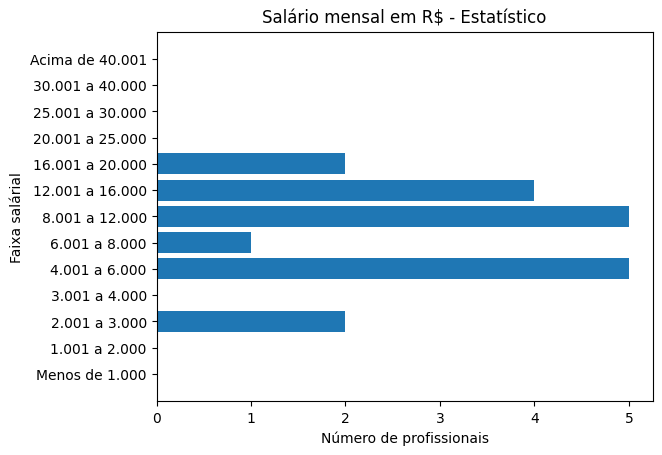

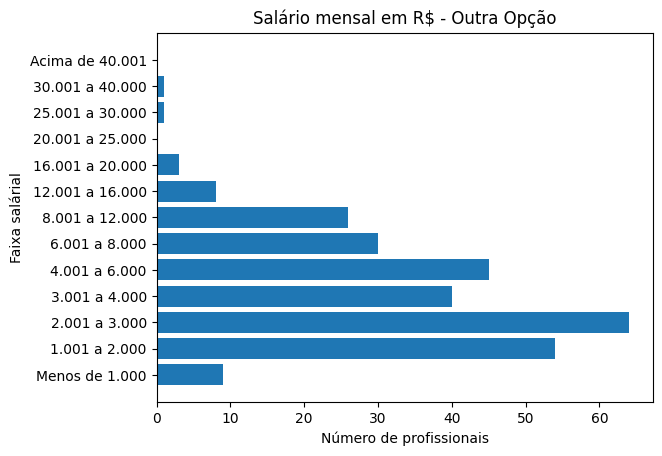

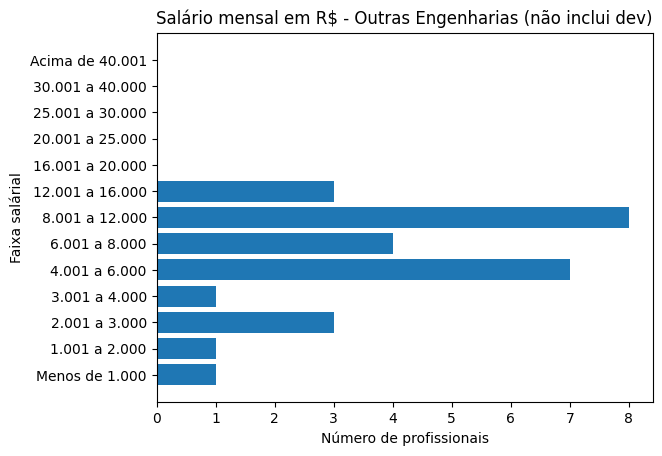

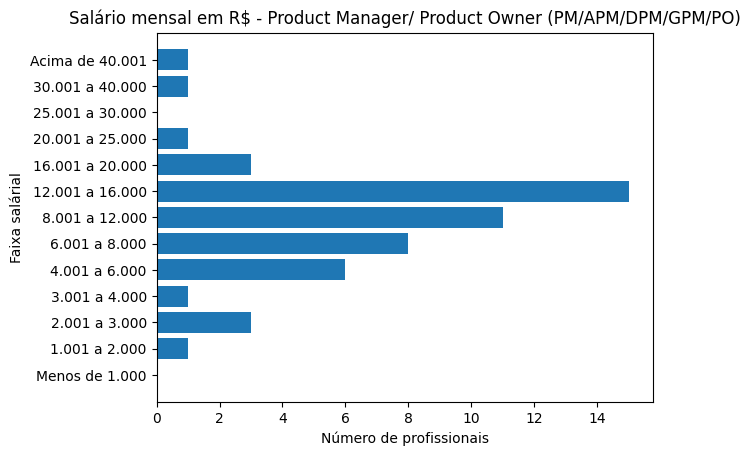

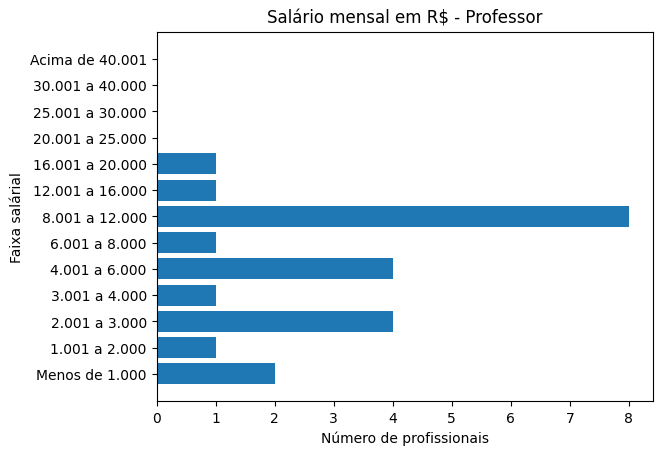

In [300]:
# Realizando um looping para gerar gráficos para cada cargo
for cargo in lista_cargos:
  df_cargos_salarios_grouped = df_cargos_salarios[df_cargos_salarios["('P2_f ', 'Cargo Atual')"] == cargo].groupby("('P2_h ', 'Faixa salarial')").count()

  df_cargos_salarios_grouped = df_cargos_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_cargos_salarios_grouped["('P2_f ', 'Cargo Atual')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial')
  plt.title(f'Salário mensal em R$ - {cargo}')
  plt.show()

In [259]:
cargos_matrix = (df_cargos_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P2_f ', 'Cargo Atual')"].value_counts().unstack().fillna(0))

cargos_matrix

"('P2_f ', 'Cargo Atual')",Analista de BI/BI Analyst,Analista de Dados/Data Analyst,Analista de Inteligência de Mercado/Market Intelligence,Analista de Marketing,Analista de Negócios/Business Analyst,Analista de Suporte/Analista Técnico,Analytics Engineer,Cientista de Dados/Data Scientist,DBA/Administrador de Banco de Dados,Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas,Economista,Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect,Engenheiro de Machine Learning/ML Engineer,Estatístico,Outra Opção,Outras Engenharias (não inclui dev),Product Manager/ Product Owner (PM/APM/DPM/GPM/PO),Professor
"('P2_h ', 'Faixa salarial')",,,,,,,,,,,,,,,,,,
Acima de R$ 40.001/mês,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,1.0,0.0
Menos de R$ 1.000/mês,3.0,4.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,2.0
de R$ 1.001/mês a R$ 2.000/mês,35.0,35.0,3.0,1.0,4.0,12.0,4.0,16.0,2.0,6.0,4.0,23.0,1.0,0.0,54.0,1.0,1.0,1.0
de R$ 12.001/mês a R$ 16.000/mês,20.0,46.0,1.0,1.0,10.0,1.0,16.0,96.0,1.0,5.0,1.0,90.0,7.0,4.0,8.0,3.0,15.0,1.0
de R$ 16.001/mês a R$ 20.000/mês,3.0,11.0,0.0,0.0,1.0,0.0,1.0,32.0,0.0,3.0,0.0,23.0,4.0,2.0,3.0,0.0,3.0,1.0
de R$ 2.001/mês a R$ 3.000/mês,39.0,49.0,3.0,3.0,9.0,22.0,1.0,33.0,0.0,16.0,1.0,19.0,1.0,2.0,64.0,3.0,3.0,4.0
de R$ 20.001/mês a R$ 25.000/mês,3.0,4.0,0.0,0.0,3.0,0.0,3.0,10.0,1.0,2.0,0.0,12.0,3.0,0.0,0.0,0.0,1.0,0.0
de R$ 25.001/mês a R$ 30.000/mês,1.0,2.0,0.0,0.0,1.0,0.0,2.0,4.0,0.0,1.0,1.0,7.0,4.0,0.0,1.0,0.0,0.0,0.0
de R$ 3.001/mês a R$ 4.000/mês,57.0,77.0,5.0,4.0,15.0,14.0,2.0,25.0,0.0,12.0,2.0,21.0,0.0,0.0,40.0,1.0,1.0,1.0


In [260]:
df_hm = pd.DataFrame(cargos_matrix, index = faixas_ordenadas,
                  columns = lista_cargos)
df_hm

,Analista de BI/BI Analyst,Analista de Dados/Data Analyst,Analista de Inteligência de Mercado/Market Intelligence,Analista de Marketing,Analista de Negócios/Business Analyst,Analista de Suporte/Analista Técnico,Analytics Engineer,Cientista de Dados/Data Scientist,DBA/Administrador de Banco de Dados,Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas,Economista,Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect,Engenheiro de Machine Learning/ML Engineer,Estatístico,Outra Opção,Outras Engenharias (não inclui dev),Product Manager/ Product Owner (PM/APM/DPM/GPM/PO),Professor
Menos de R$ 1.000/mês,3.0,4.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,2.0
de R$ 1.001/mês a R$ 2.000/mês,35.0,35.0,3.0,1.0,4.0,12.0,4.0,16.0,2.0,6.0,4.0,23.0,1.0,0.0,54.0,1.0,1.0,1.0
de R$ 2.001/mês a R$ 3.000/mês,39.0,49.0,3.0,3.0,9.0,22.0,1.0,33.0,0.0,16.0,1.0,19.0,1.0,2.0,64.0,3.0,3.0,4.0
de R$ 3.001/mês a R$ 4.000/mês,57.0,77.0,5.0,4.0,15.0,14.0,2.0,25.0,0.0,12.0,2.0,21.0,0.0,0.0,40.0,1.0,1.0,1.0
de R$ 4.001/mês a R$ 6.000/mês,93.0,160.0,7.0,8.0,23.0,9.0,7.0,75.0,2.0,13.0,0.0,76.0,7.0,5.0,45.0,7.0,6.0,4.0
de R$ 6.001/mês a R$ 8.000/mês,68.0,111.0,6.0,1.0,23.0,3.0,9.0,105.0,1.0,18.0,2.0,75.0,14.0,1.0,30.0,4.0,8.0,1.0
de R$ 8.001/mês a R$ 12.000/mês,55.0,134.0,4.0,1.0,34.0,8.0,23.0,141.0,5.0,26.0,4.0,132.0,20.0,5.0,26.0,8.0,11.0,8.0
de R$ 12.001/mês a R$ 16.000/mês,20.0,46.0,1.0,1.0,10.0,1.0,16.0,96.0,1.0,5.0,1.0,90.0,7.0,4.0,8.0,3.0,15.0,1.0
de R$ 16.001/mês a R$ 20.000/mês,3.0,11.0,0.0,0.0,1.0,0.0,1.0,32.0,0.0,3.0,0.0,23.0,4.0,2.0,3.0,0.0,3.0,1.0
de R$ 20.001/mês a R$ 25.000/mês,3.0,4.0,0.0,0.0,3.0,0.0,3.0,10.0,1.0,2.0,0.0,12.0,3.0,0.0,0.0,0.0,1.0,0.0


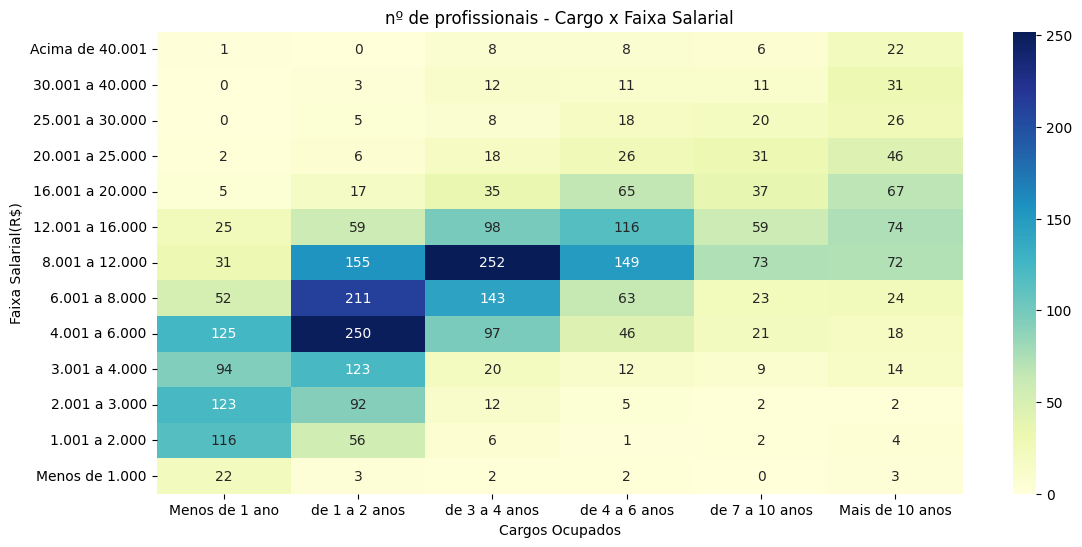

In [284]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f', yticklabels = labels[::-1])

# plt.barh(labels, df_etnia_salarios_grouped["('P1_c ', 'Cor/raca/etnia')"][faixas_ordenadas])

plt.title('nº de profissionais - Cargo x Faixa Salarial')
plt.xlabel('Cargos Ocupados')
plt.ylabel('Faixa Salarial(R$)')
plt.show()

# Análise Salarial por Tempo de Carreira

In [263]:
df_tempo_carreira_salarios = df.filter(items=["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_h ', 'Faixa salarial')"])
df_tempo_carreira_salarios.dropna()

,"('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_h ', 'Faixa salarial')"
0,de 1 a 2 anos,de R$ 8.001/mês a R$ 12.000/mês
1,de 3 a 4 anos,de R$ 4.001/mês a R$ 6.000/mês
2,de 3 a 4 anos,de R$ 12.001/mês a R$ 16.000/mês
3,de 4 a 6 anos,de R$ 12.001/mês a R$ 16.000/mês
4,Não tenho experiência na área de dados,de R$ 6.001/mês a R$ 8.000/mês
...,...,...
4266,de 3 a 4 anos,de R$ 4.001/mês a R$ 6.000/mês
4267,de 1 a 2 anos,de R$ 3.001/mês a R$ 4.000/mês
4268,de 4 a 6 anos,de R$ 16.001/mês a R$ 20.000/mês
4269,Menos de 1 ano,Menos de R$ 1.000/mês


In [265]:
df_tempo_carreira_salarios["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].unique()

array(['de 1 a 2 anos', 'de 3 a 4 anos', 'de 4 a 6 anos',
       'Não tenho experiência na área de dados', 'Menos de 1 ano',
       'Mais de 10 anos', nan, 'de 7 a 10 anos'], dtype=object)

In [266]:
lista_tempo_carreira = ['Menos de 1 ano', 'de 1 a 2 anos', 'de 3 a 4 anos', 'de 4 a 6 anos', 'de 7 a 10 anos',
       'Mais de 10 anos']

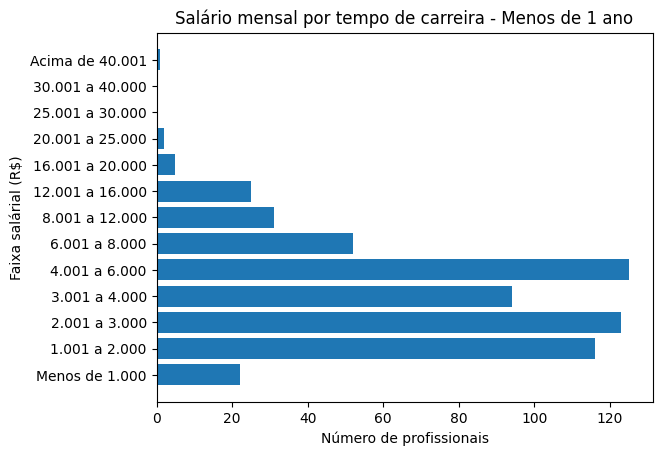

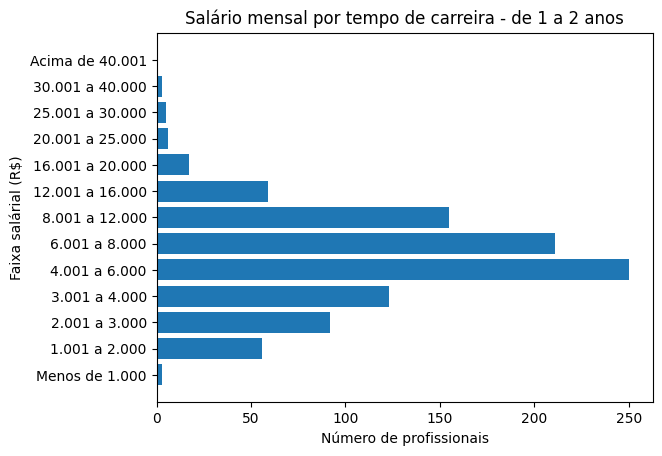

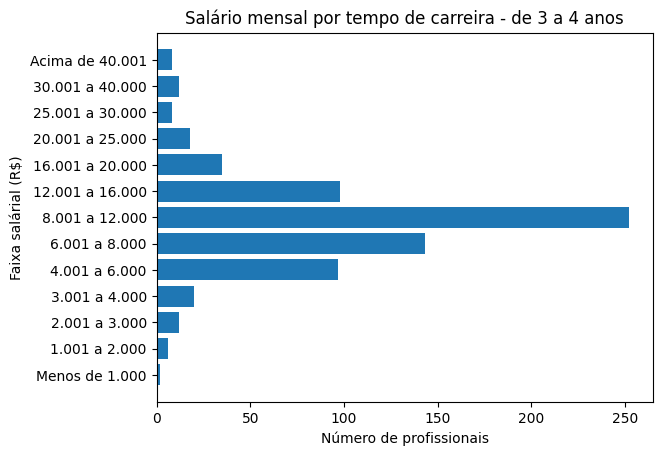

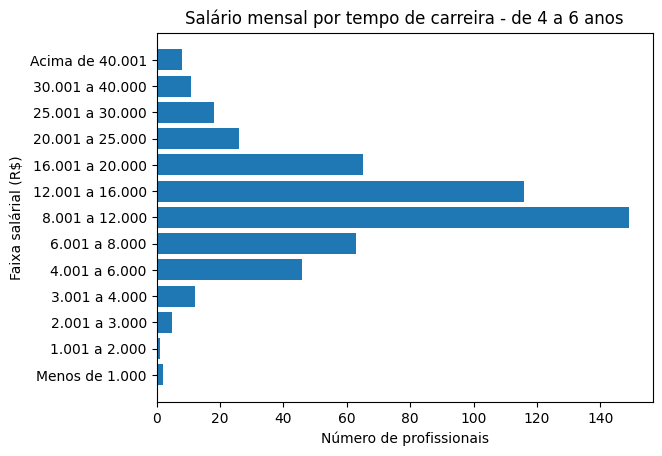

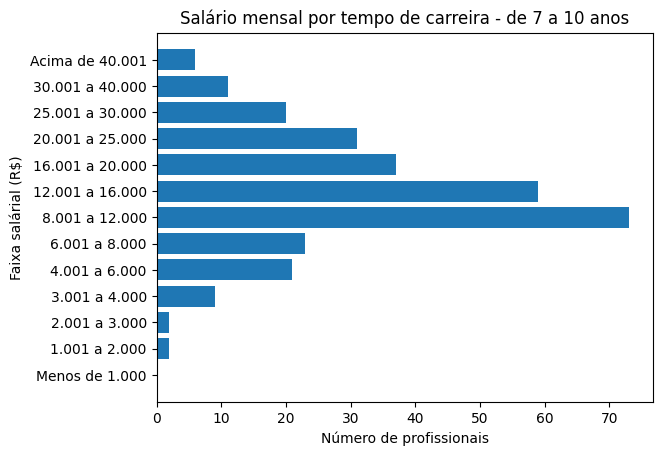

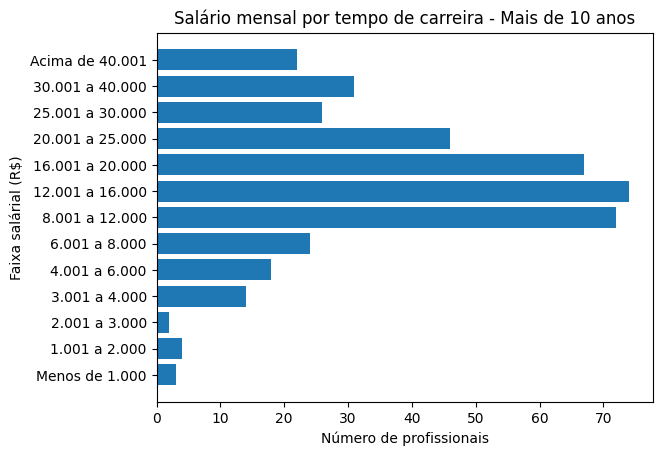

In [304]:
for tempo in lista_tempo_carreira:
  df_tempo_carreira_salarios_grouped = df_tempo_carreira_salarios[df_tempo_carreira_salarios["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"] == tempo].groupby("('P2_h ', 'Faixa salarial')").count()

  df_tempo_carreira_salarios_grouped = df_tempo_carreira_salarios_grouped.reindex(faixas_ordenadas).fillna(0)

  plt.barh(labels, df_tempo_carreira_salarios_grouped["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"][faixas_ordenadas])
  plt.xlabel('Número de profissionais')
  plt.ylabel('Faixa salárial (R$)')
  plt.title(f'Salário mensal por tempo de carreira - {tempo}')
  plt.show()

In [271]:
tempo_matrix = (df_tempo_carreira_salarios.groupby("('P2_h ', 'Faixa salarial')")["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].value_counts().unstack().fillna(0))

tempo_matrix

"('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",Mais de 10 anos,Menos de 1 ano,Não tenho experiência na área de dados,de 1 a 2 anos,de 3 a 4 anos,de 4 a 6 anos,de 7 a 10 anos
"('P2_h ', 'Faixa salarial')",,,,,,,
Acima de R$ 40.001/mês,22.0,1.0,0.0,0.0,8.0,8.0,6.0
Menos de R$ 1.000/mês,3.0,22.0,3.0,3.0,2.0,2.0,0.0
de R$ 1.001/mês a R$ 2.000/mês,4.0,116.0,31.0,56.0,6.0,1.0,2.0
de R$ 12.001/mês a R$ 16.000/mês,74.0,25.0,6.0,59.0,98.0,116.0,59.0
de R$ 16.001/mês a R$ 20.000/mês,67.0,5.0,3.0,17.0,35.0,65.0,37.0
de R$ 2.001/mês a R$ 3.000/mês,2.0,123.0,49.0,92.0,12.0,5.0,2.0
de R$ 20.001/mês a R$ 25.000/mês,46.0,2.0,5.0,6.0,18.0,26.0,31.0
de R$ 25.001/mês a R$ 30.000/mês,26.0,0.0,0.0,5.0,8.0,18.0,20.0
de R$ 3.001/mês a R$ 4.000/mês,14.0,94.0,31.0,123.0,20.0,12.0,9.0


In [306]:
df_hm_tempo = pd.DataFrame(tempo_matrix, index = faixas_ordenadas,
                  columns = lista_tempo_carreira)
df_hm_tempo

,Menos de 1 ano,de 1 a 2 anos,de 3 a 4 anos,de 4 a 6 anos,de 7 a 10 anos,Mais de 10 anos
Menos de R$ 1.000/mês,22.0,3.0,2.0,2.0,0.0,3.0
de R$ 1.001/mês a R$ 2.000/mês,116.0,56.0,6.0,1.0,2.0,4.0
de R$ 2.001/mês a R$ 3.000/mês,123.0,92.0,12.0,5.0,2.0,2.0
de R$ 3.001/mês a R$ 4.000/mês,94.0,123.0,20.0,12.0,9.0,14.0
de R$ 4.001/mês a R$ 6.000/mês,125.0,250.0,97.0,46.0,21.0,18.0
de R$ 6.001/mês a R$ 8.000/mês,52.0,211.0,143.0,63.0,23.0,24.0
de R$ 8.001/mês a R$ 12.000/mês,31.0,155.0,252.0,149.0,73.0,72.0
de R$ 12.001/mês a R$ 16.000/mês,25.0,59.0,98.0,116.0,59.0,74.0
de R$ 16.001/mês a R$ 20.000/mês,5.0,17.0,35.0,65.0,37.0,67.0
de R$ 20.001/mês a R$ 25.000/mês,2.0,6.0,18.0,26.0,31.0,46.0


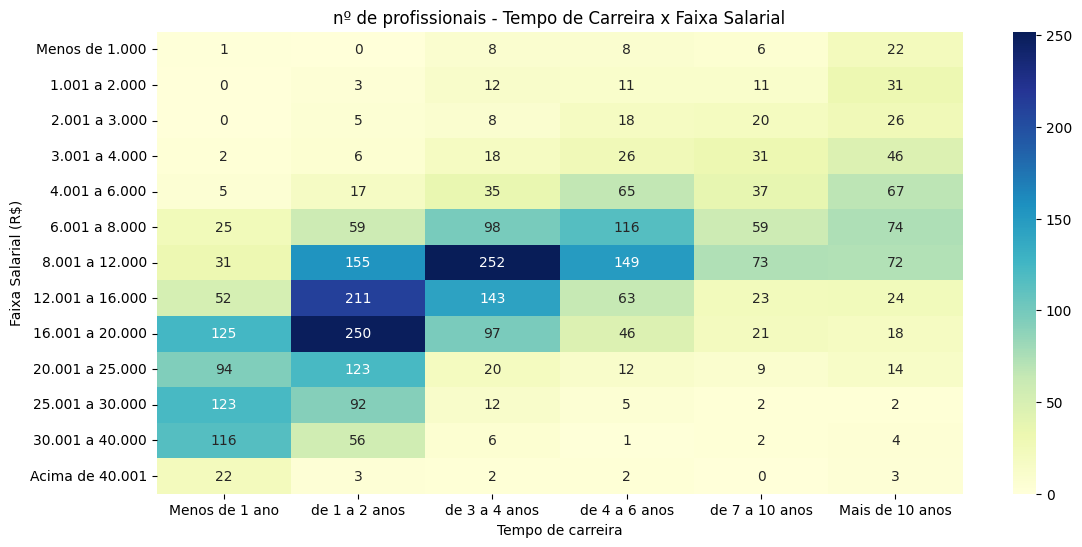

In [309]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_hm_tempo.reindex(faixas_ordenadas[::-1]), cmap='YlGnBu', annot=True, fmt='.0f', yticklabels = labels)

# plt.barh(labels, df_etnia_salarios_grouped["('P1_c ', 'Cor/raca/etnia')"][faixas_ordenadas])

plt.title('nº de profissionais - Tempo de Carreira x Faixa Salarial')
plt.xlabel('Tempo de carreira')
plt.ylabel('Faixa Salarial (R$)')
plt.show()